'''
question:
 1、explain in your own words what temperature ‘anomalies’ are. 
 2、Why have researchers chosen this particular measure over other measures(such as absolute temperature)?
'''
'''
answer:
1、A temperature “anomalies” is the difference between the actual temperature at a location and a long-term average (base temperature).
2、Researchers prefer to use temperature anomalies rather than absolute temperatures (directly measured temperatures) for the following main reasons: data consistency, long-term trend analysis, and reduction of measurement error situations.
'''


In [110]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pingouin as pg
from lets_plot import *

LetsPlot.setup_html(no_js=True)
plt.style.use(
    "https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt"
)

In [ ]:
'''
open files that are stored locally on your computer. 
Instead of a URL, enter a file path to wherever you saved your data (enclosed in quotation marks).

df = pd.read_csv(
    "D:/python/homework/zhuhaoyu-practiceone/NH.Ts+dSST.csv",
    skiprows=1,
    na_values="***",
)
'''
df = pd.read_csv(
    "https://data.giss.nasa.gov/gistemp/tabledata_v4/NH.Ts+dSST.csv",
    skiprows=1,
    na_values="***",
)



In [112]:
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.39,-0.54,-0.24,-0.31,-0.06,-0.18,-0.22,-0.26,-0.25,-0.31,-0.44,-0.43,-0.30,NaN,NaN,-0.20,-0.22,-0.33
1,1881,-0.31,-0.25,-0.06,-0.02,0.05,-0.34,0.09,-0.06,-0.29,-0.45,-0.37,-0.23,-0.19,-0.20,-0.33,-0.01,-0.10,-0.37
2,1882,0.26,0.21,0.02,-0.30,-0.23,-0.29,-0.28,-0.15,-0.25,-0.52,-0.34,-0.69,-0.21,-0.18,0.08,-0.17,-0.24,-0.37
3,1883,-0.58,-0.66,-0.15,-0.30,-0.26,-0.12,-0.06,-0.23,-0.34,-0.17,-0.45,-0.15,-0.29,-0.33,-0.64,-0.24,-0.14,-0.32
4,1884,-0.16,-0.11,-0.64,-0.59,-0.36,-0.42,-0.41,-0.52,-0.45,-0.45,-0.58,-0.47,-0.43,-0.40,-0.14,-0.53,-0.45,-0.50


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    145 non-null    int64  
 1   Jan     145 non-null    float64
 2   Feb     145 non-null    float64
 3   Mar     145 non-null    float64
 4   Apr     145 non-null    float64
 5   May     145 non-null    float64
 6   Jun     145 non-null    float64
 7   Jul     145 non-null    float64
 8   Aug     145 non-null    float64
 9   Sep     145 non-null    float64
 10  Oct     144 non-null    float64
 11  Nov     144 non-null    float64
 12  Dec     144 non-null    float64
 13  J-D     144 non-null    float64
 14  D-N     143 non-null    float64
 15  DJF     144 non-null    float64
 16  MAM     145 non-null    float64
 17  JJA     145 non-null    float64
 18  SON     144 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 21.6 KB


In [114]:

df = df.set_index("Year")
df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
Year,,,,,,,,,,,,,,,,,,
1880,-0.39,-0.54,-0.24,-0.31,-0.06,-0.18,-0.22,-0.26,-0.25,-0.31,-0.44,-0.43,-0.30,NaN,NaN,-0.20,-0.22,-0.33
1881,-0.31,-0.25,-0.06,-0.02,0.05,-0.34,0.09,-0.06,-0.29,-0.45,-0.37,-0.23,-0.19,-0.20,-0.33,-0.01,-0.10,-0.37
1882,0.26,0.21,0.02,-0.30,-0.23,-0.29,-0.28,-0.15,-0.25,-0.52,-0.34,-0.69,-0.21,-0.18,0.08,-0.17,-0.24,-0.37
1883,-0.58,-0.66,-0.15,-0.30,-0.26,-0.12,-0.06,-0.23,-0.34,-0.17,-0.45,-0.15,-0.29,-0.33,-0.64,-0.24,-0.14,-0.32
1884,-0.16,-0.11,-0.64,-0.59,-0.36,-0.42,-0.41,-0.52,-0.45,-0.45,-0.58,-0.47,-0.43,-0.40,-0.14,-0.53,-0.45,-0.50


In [115]:
df.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
Year,,,,,,,,,,,,,,,,,,
2020,1.58,1.69,1.66,1.39,1.26,1.14,1.10,1.12,1.19,1.20,1.58,1.18,1.34,1.36,1.56,1.44,1.12,1.32
2021,1.25,0.95,1.20,1.12,1.04,1.20,1.07,1.02,1.04,1.29,1.29,1.16,1.14,1.14,1.13,1.12,1.10,1.21
2022,1.24,1.16,1.41,1.08,1.02,1.12,1.06,1.16,1.14,1.31,1.09,1.06,1.15,1.16,1.19,1.17,1.11,1.18
2023,1.29,1.29,1.63,1.01,1.12,1.19,1.44,1.57,1.67,1.88,1.97,1.85,1.49,1.43,1.21,1.26,1.40,1.84
2024,1.66,1.93,1.77,1.79,1.44,1.54,1.42,1.42,1.57,NaN,NaN,NaN,NaN,NaN,1.81,1.67,1.46,NaN


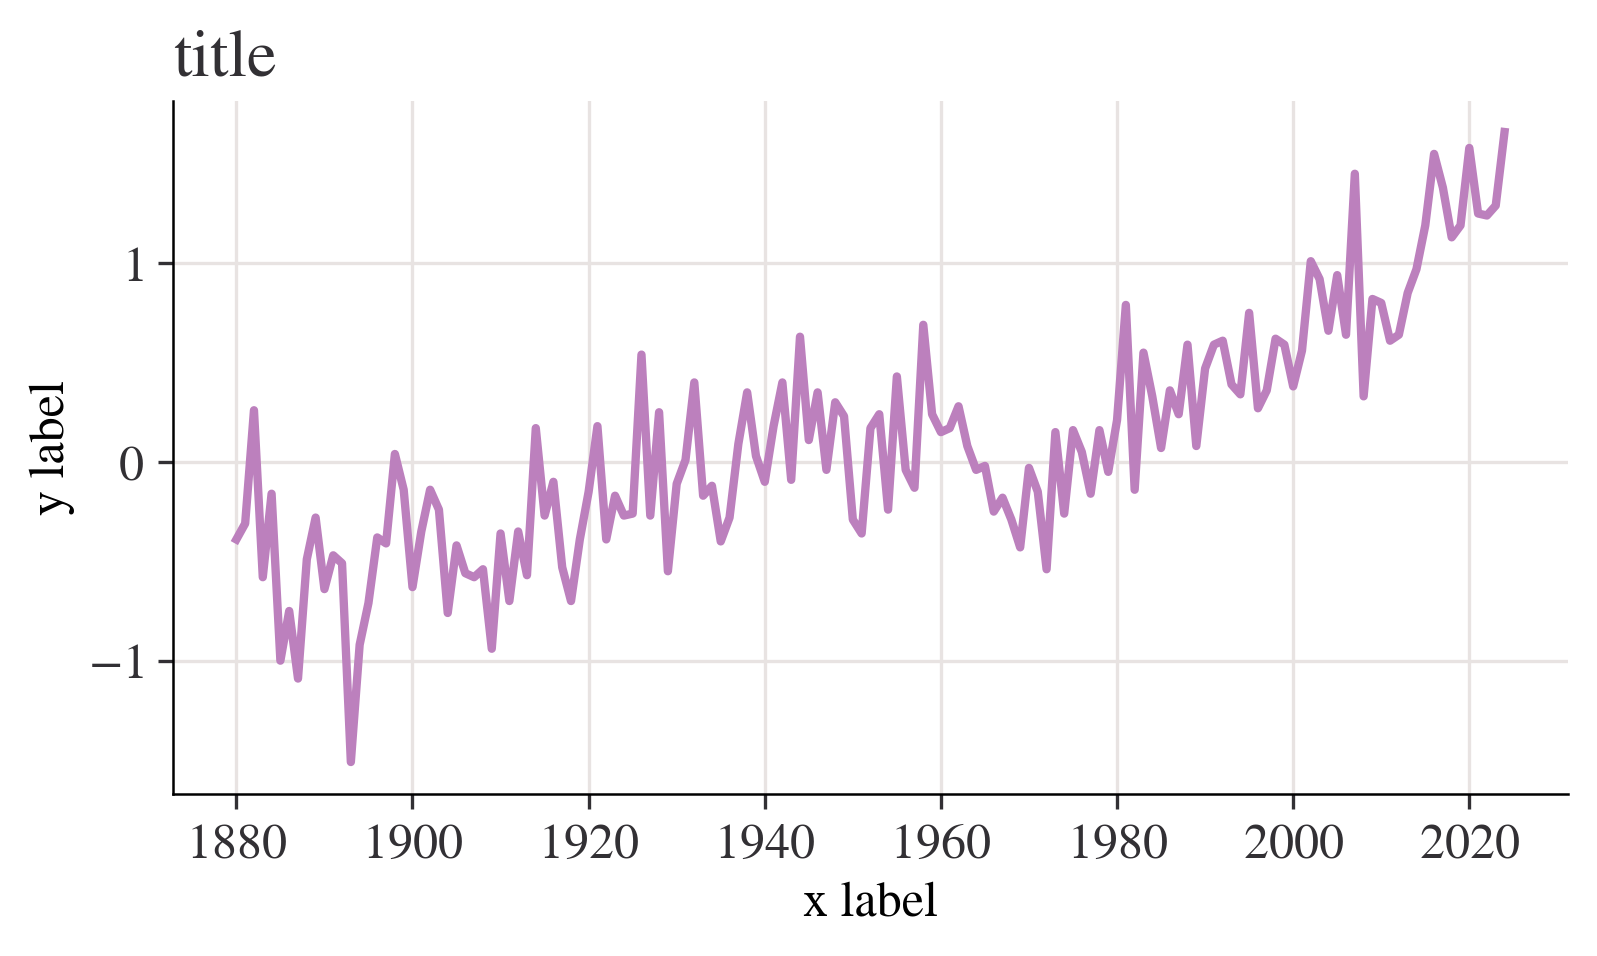

In [116]:

# onto which to put chart elements
fig, ax = plt.subplots()
# select the column to use 'plot' on, and pass the ax object
# note that the horizontal axis is given by the index of the dataframe
df["Jan"].plot(ax=ax)
# set the labels and title
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.set_title("title")
# show the plot
plt.show()

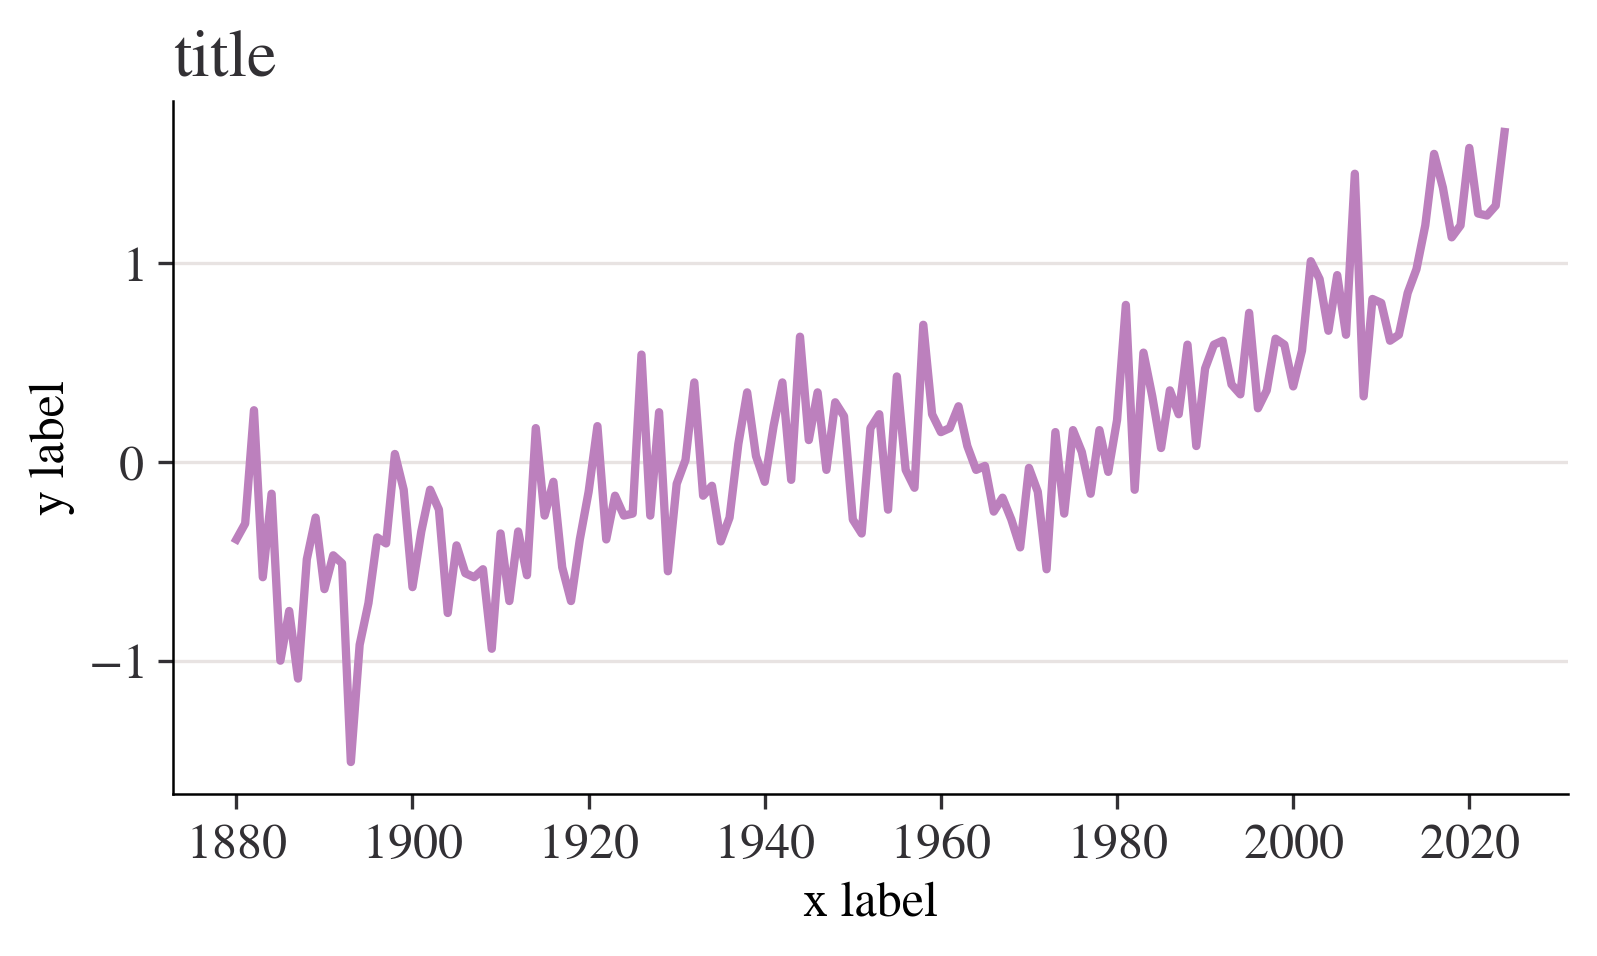

<Figure size 1800x900 with 0 Axes>

In [ ]:

fig, ax= plt.subplots()
ax.plot(df.index, df["Jan"])
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.set_title("title")
plt.show()
'''
save charts to file with .)ax.[something]plt.show()plt.savefig(name–of–chart.pdf)
'''
plt.savefig('weather.pdf')

Text(0, 0.5, 'Annual temperature anomalies')

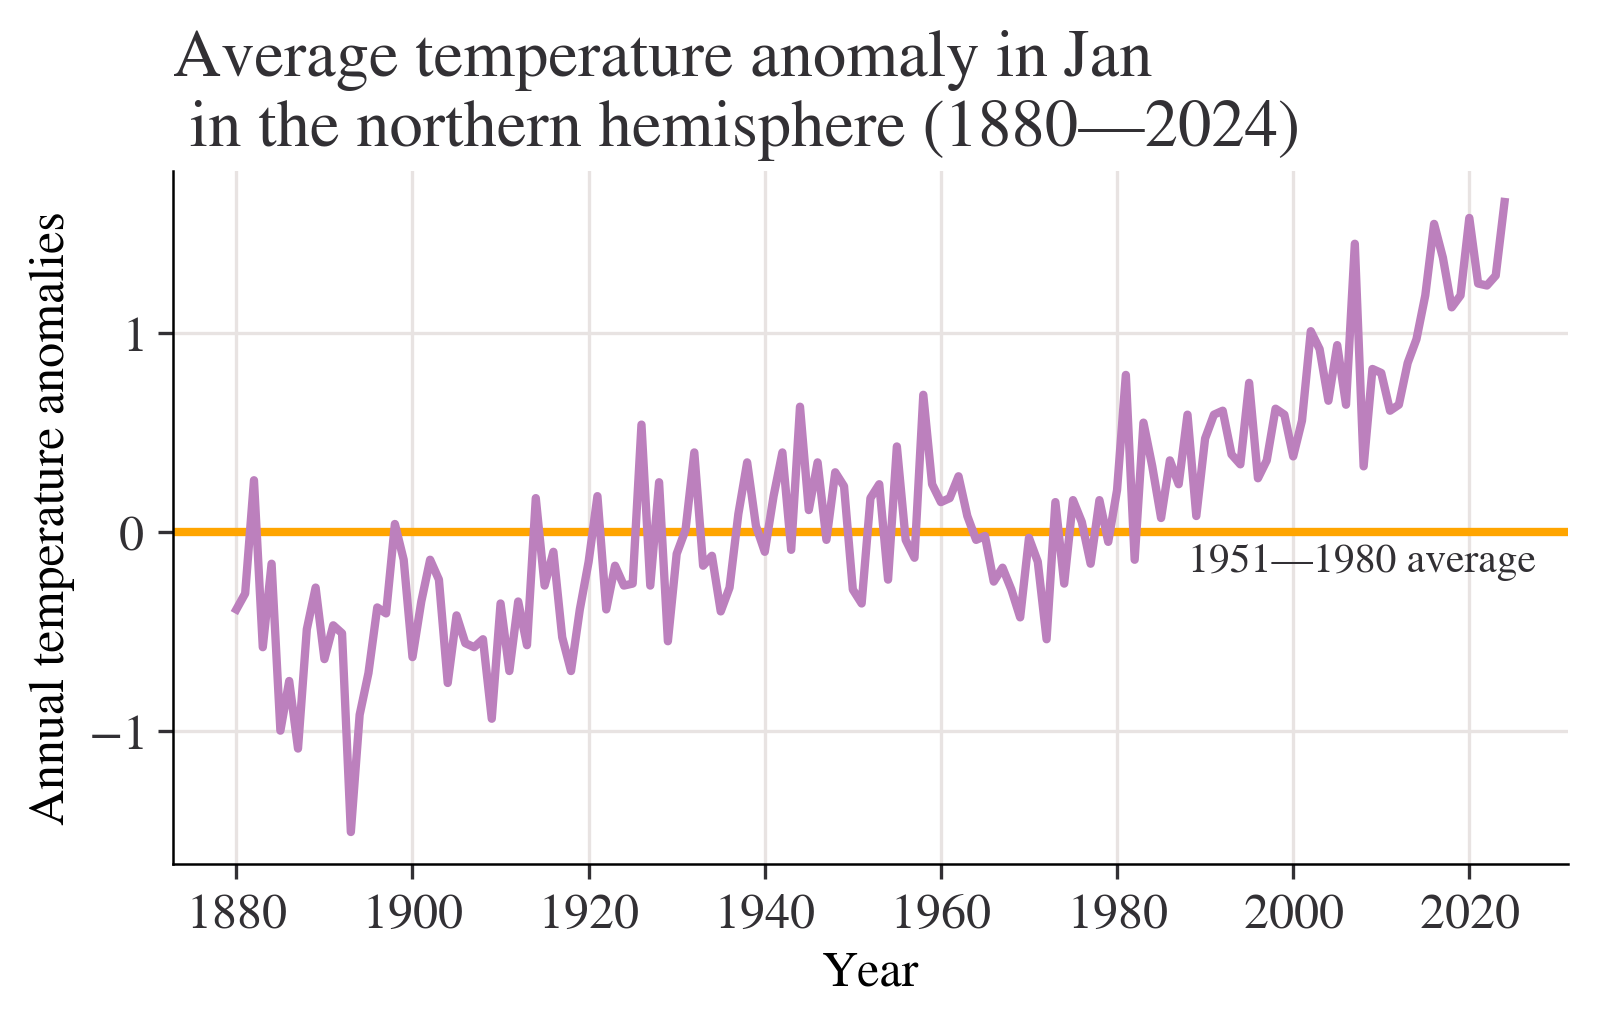

In [118]:

month = "Jan"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.66, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average temperature anomaly in {month} \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies")

'''
Question:Try different values for , , and the first argument of in the plot function to 
figure out what these options do. (Note that set the behaviour of .)colorxyax.
axhlinexycoordsxy
Answer:
color:Color of the average
xy:The position of annotate in the coordinate axes
ax.axhline:(a,b);a denotes the y-axis coordinate of axhline and b denotes the color of axhilin
xycoords:Coordinate system properties of the annotated point.
'figure pixels' Reference to the lower left corner of the plot, in pixels.
' data' reference to the annotated point xy (default) 
'''

Text(0, 0.5, 'Annual temperature anomalies')

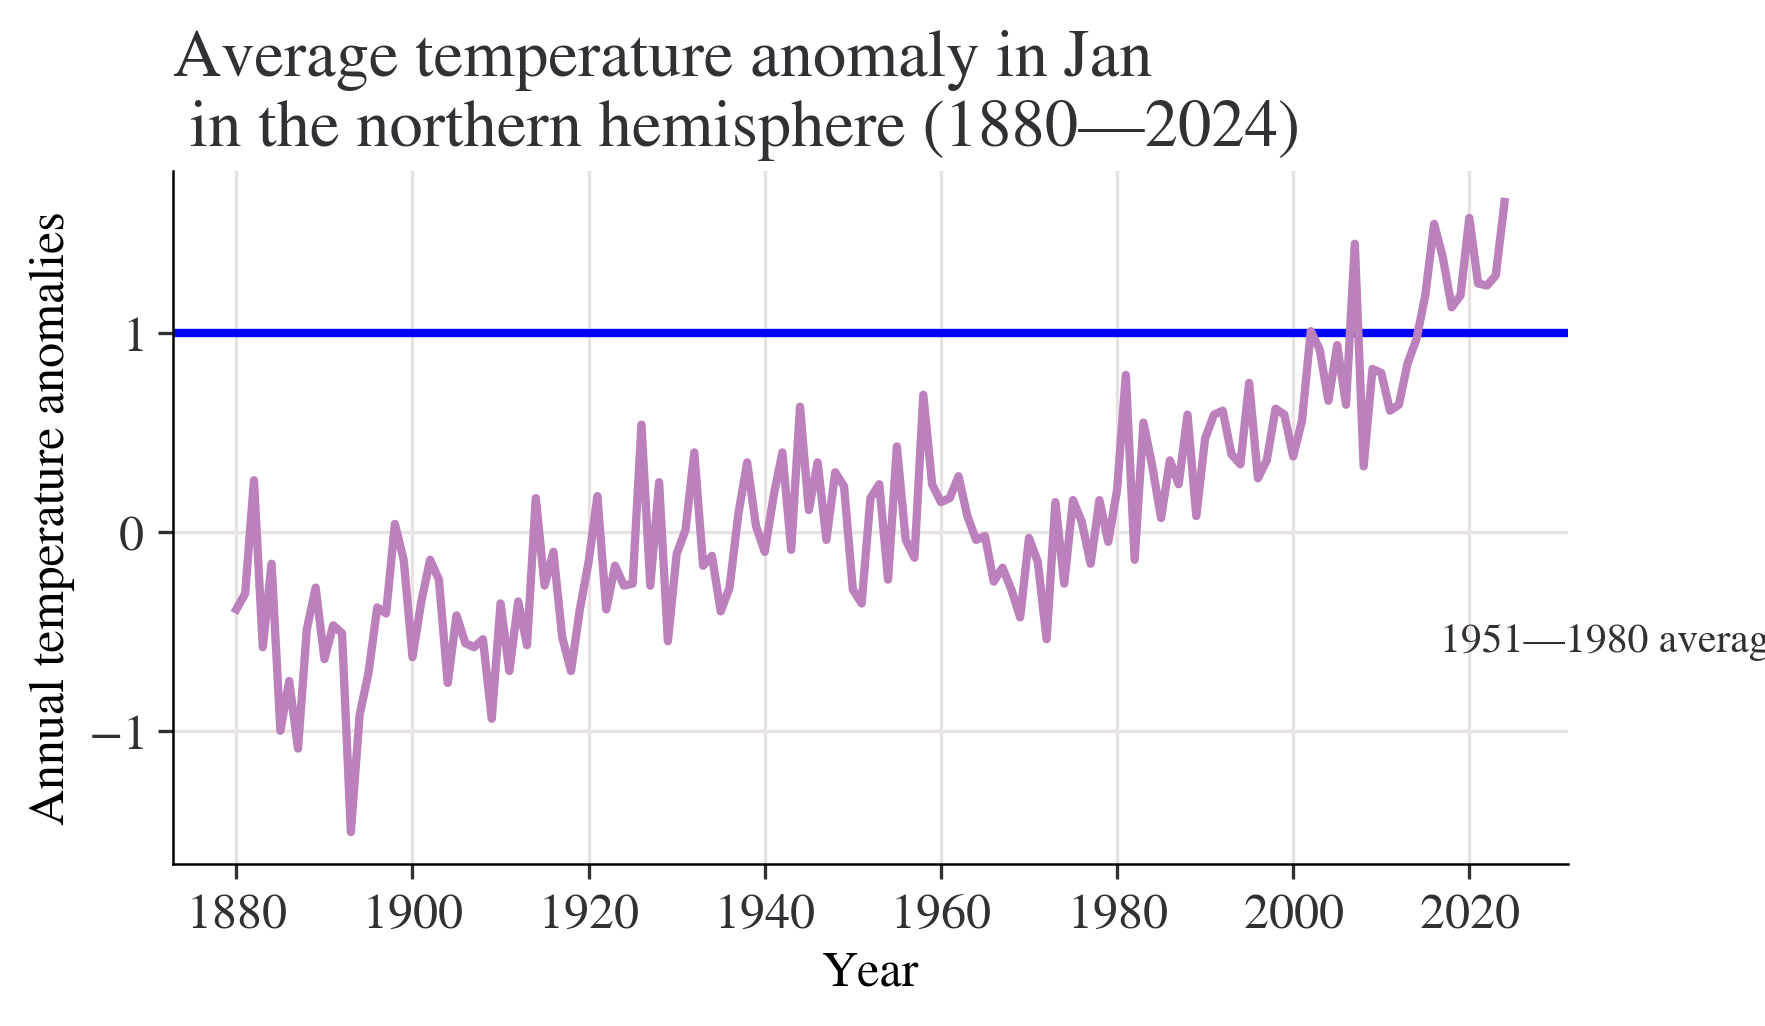

In [119]:

month = "Jan"
fig, ax = plt.subplots()
ax.axhline(1, color="blue")
ax.annotate("1951—1980 average", xy=(0.8, -0.6), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average temperature anomaly in {month} \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies")

Text(0, 0.5, 'May')

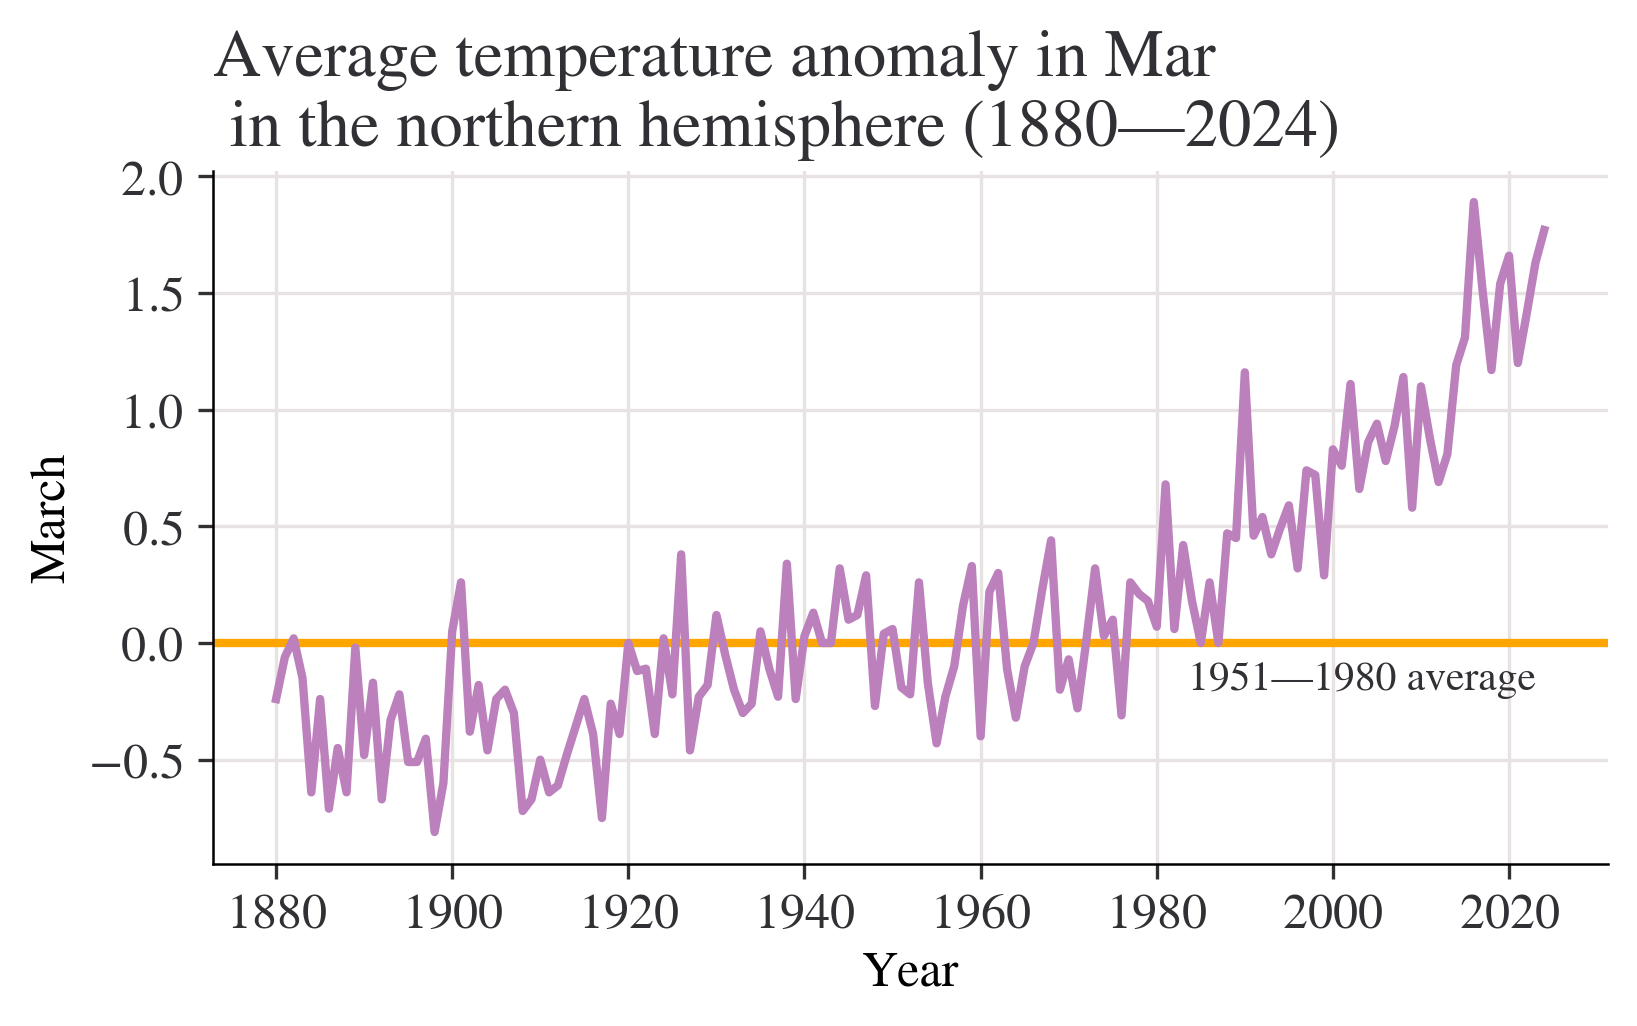

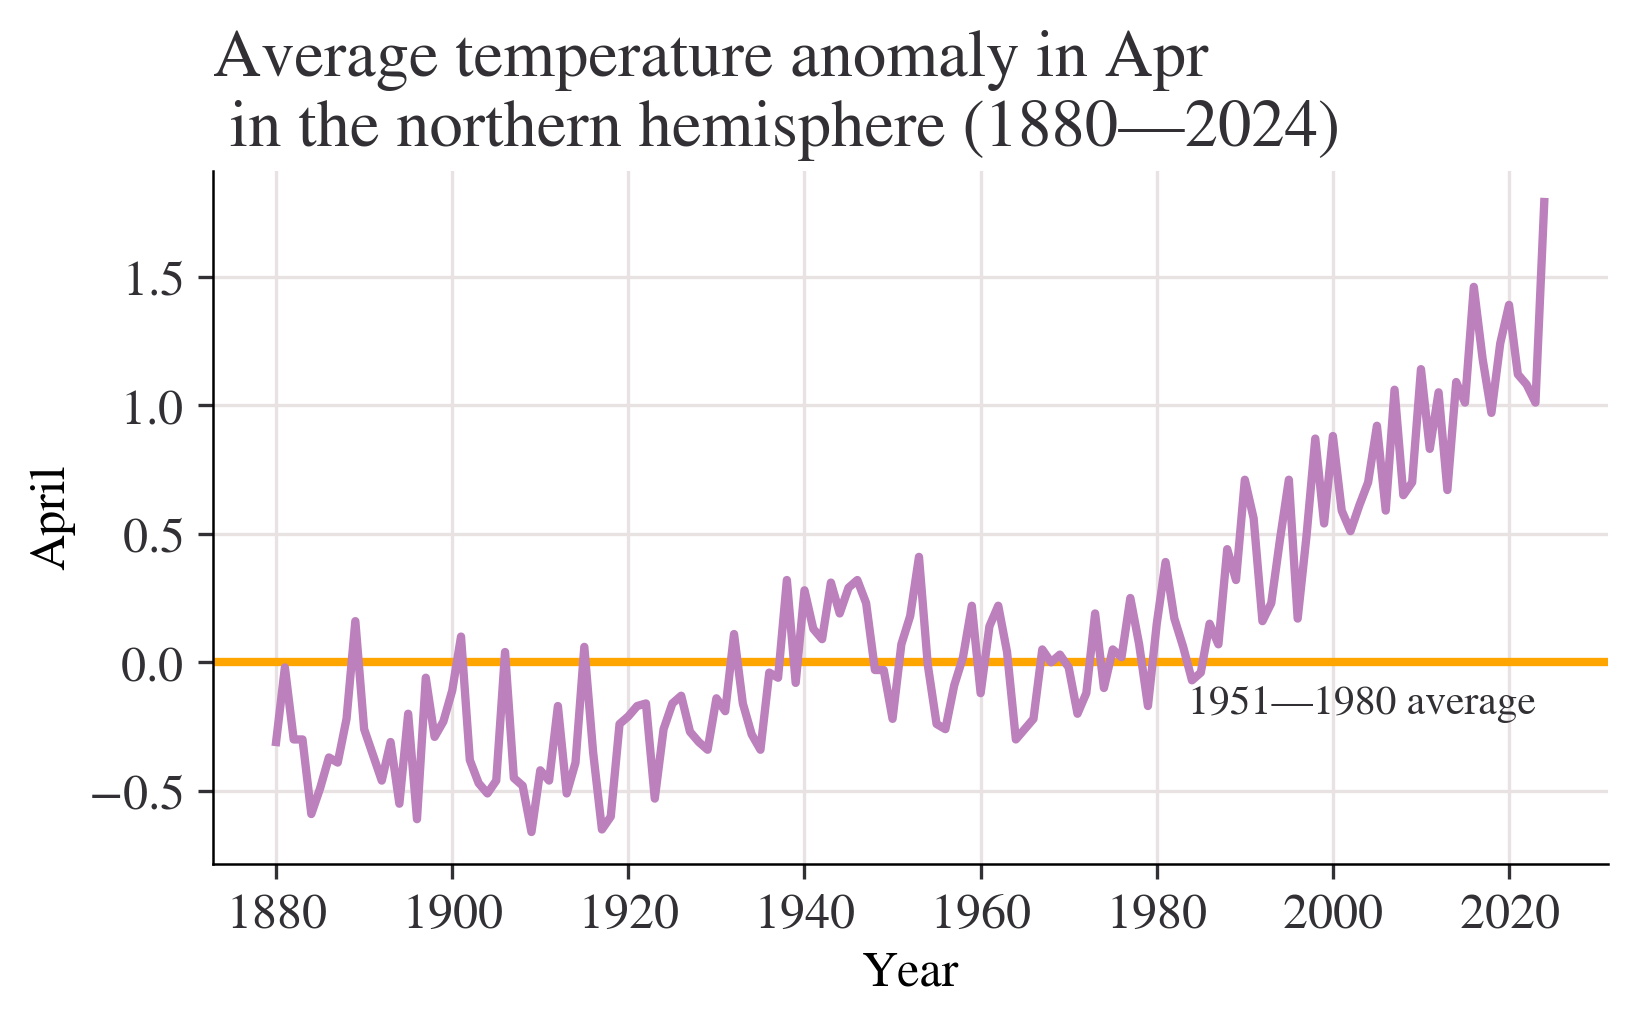

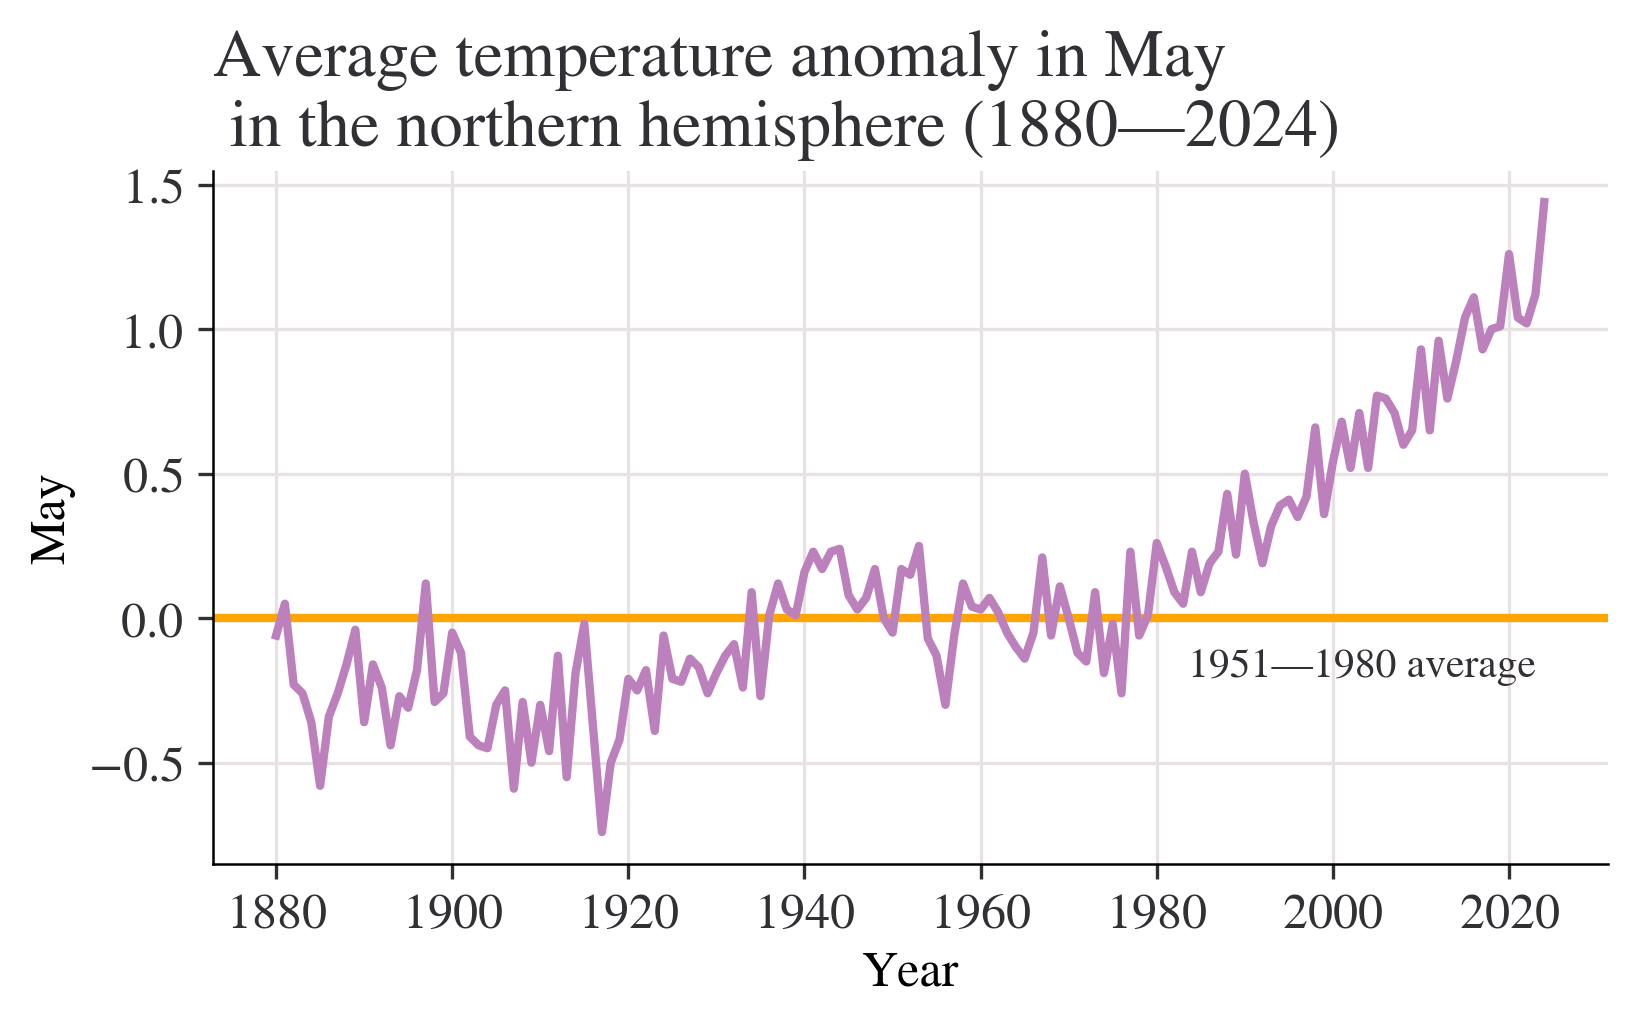

In [120]:
'''
Extra practice: The columns labelled , , , and contain seasonal averages (means).
For example, the column contains the average of the March, April, and May columns for each year.
'''
month1 = "Mar"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.66, -0.2), xycoords=("figure fraction", "data"))
df[month1].plot(ax=ax)
ax.set_title(
    f"Average temperature anomaly in {month1} \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("March")
month2 = "Apr"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.66, -0.2), xycoords=("figure fraction", "data"))
df[month2].plot(ax=ax)
ax.set_title(
    f"Average temperature anomaly in {month2} \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("April")
month3 = "May"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.66, -0.2), xycoords=("figure fraction", "data"))
df[month3].plot(ax=ax)
ax.set_title(
    f"Average temperature anomaly in {month3} \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("May")


Text(0, 0.5, 'Annual temperature anomalies')

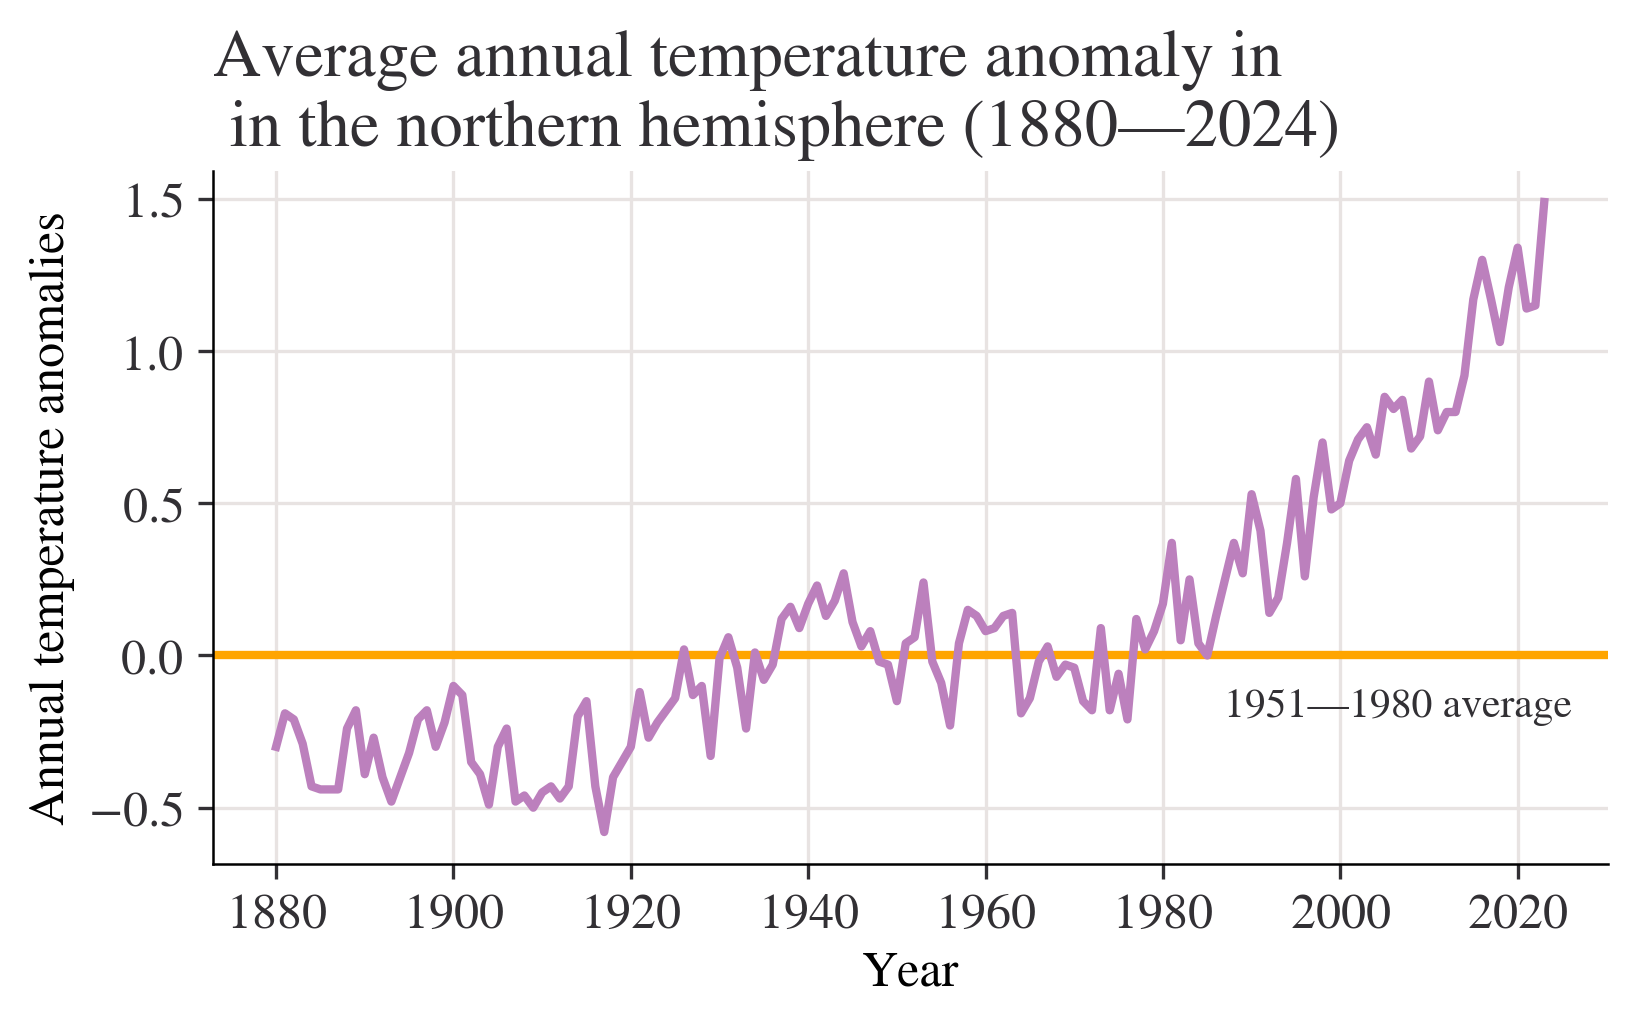

In [121]:

month = "J-D"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.68, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average annual temperature anomaly in \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies")


In [122]:
export_data = df[['J-D']].copy()
export_data['Average Anomaly'] = 0  

# Export to CSV file
export_data.to_csv("temperature_anomaly_data.csv", index=True)

'''
What do your charts from Questions 2 to 4(a) suggest about the relationship between temperature and time?
Temperatures are rising year by year.

a)Horizontal axis becomes yearly variable, vertical axis variable is the same
b)hasn't
c)ought to
'''

In [123]:

df["Period"] = pd.cut(
    df.index,
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)

In [124]:

df["Period"].tail(20)

Year
2005    1981—2010
2006    1981—2010
2007    1981—2010
2008    1981—2010
2009    1981—2010
2010    1981—2010
2011          NaN
2012          NaN
2013          NaN
2014          NaN
2015          NaN
2016          NaN
2017          NaN
2018          NaN
2019          NaN
2020          NaN
2021          NaN
2022          NaN
2023          NaN
2024          NaN
Name: Period, dtype: category
Categories (3, object): ['1921—1950' < '1951—1980' < '1981—2010']

In [125]:

list_of_months = ["Jun", "Jul", "Aug"]
df[list_of_months].stack().head()


Year     
1880  Jun   -0.18
      Jul   -0.22
      Aug   -0.26
1881  Jun   -0.34
      Jul    0.09
dtype: float64

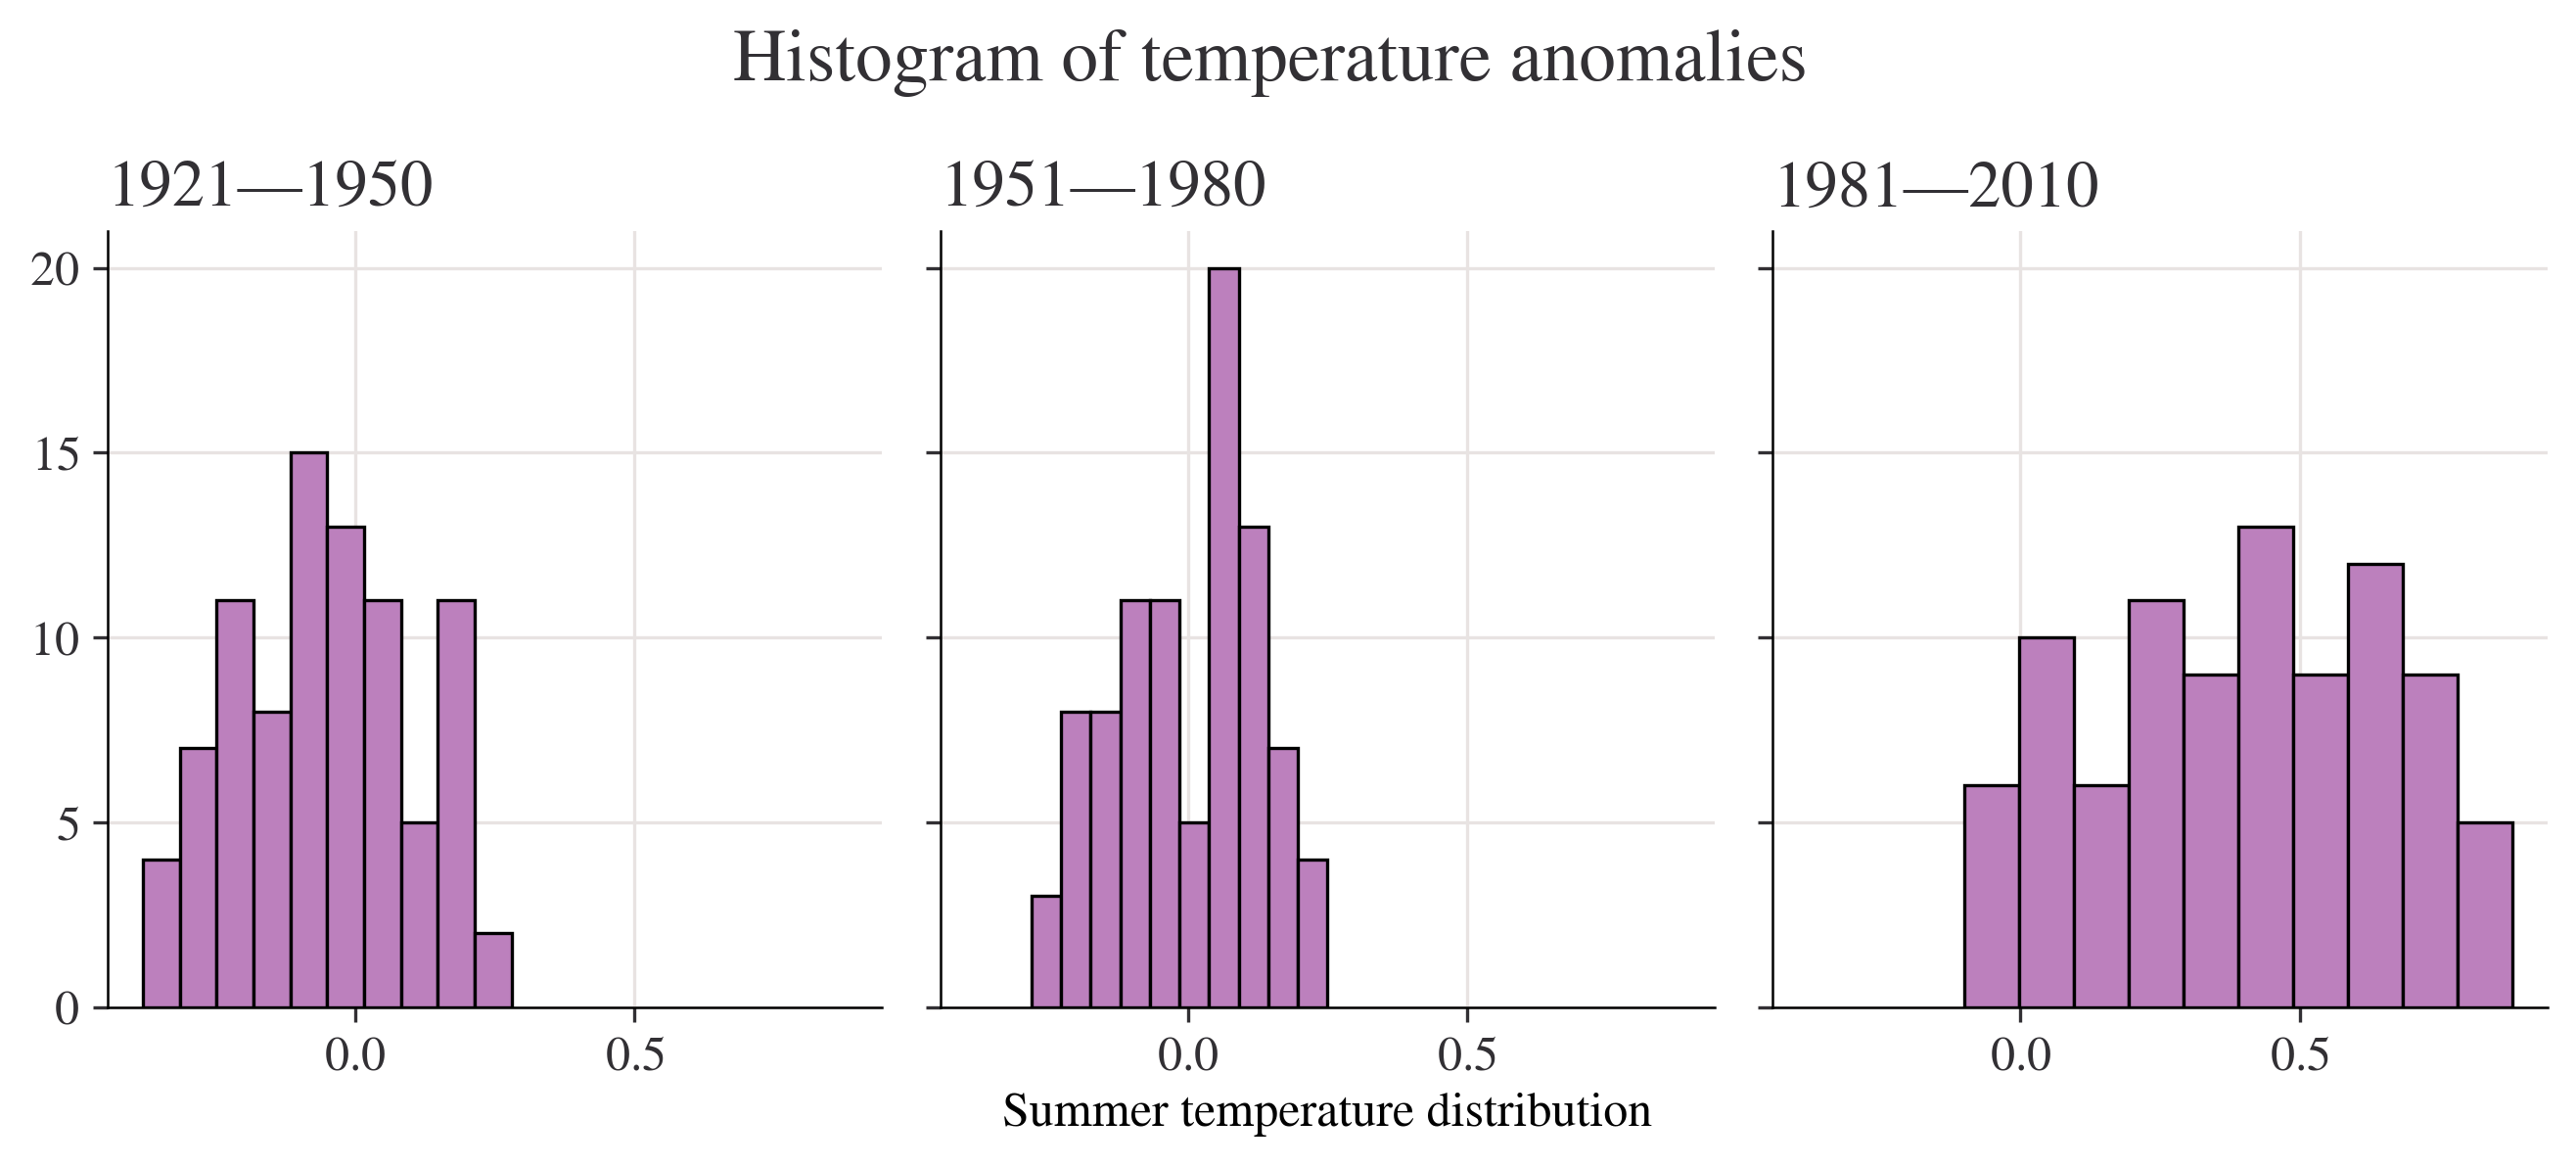

In [126]:

fig, axes = plt.subplots(ncols=3, figsize=(9, 4), sharex=True, sharey=True)
for ax, period in zip(axes, df["Period"].dropna().unique()):
    df.loc[df["Period"] == period, list_of_months].stack().hist(ax=ax)
    ax.set_title(period)
plt.suptitle("Histogram of temperature anomalies")
axes[1].set_xlabel("Summer temperature distribution")
plt.tight_layout()

In [127]:
temp_all_months = df.loc[(df.index >= 1951) & (df.index <= 1980), "Jan":"Dec"]
# Put all the data in stacked format and give the new columns sensible names
temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)
# Take a look at this data:
temp_all_months

,Year,month,values
0,1951,Jan,-0.36
1,1951,Feb,-0.51
2,1951,Mar,-0.19
3,1951,Apr,0.07
4,1951,May,0.17
...,...,...,...
355,1980,Aug,0.09
356,1980,Sep,0.10
357,1980,Oct,0.12
358,1980,Nov,0.20


In [128]:
quantiles = [0.3, 0.7]
list_of_percentiles = np.quantile(temp_all_months["values"], q=quantiles)


print(f"The cold threshold of {quantiles[0]*100}% is {list_of_percentiles[0]}")
print(f"The hot threshold of {quantiles[1]*100}% is {list_of_percentiles[1]}")

The cold threshold of 30.0% is -0.1
The hot threshold of 70.0% is 0.1


In [129]:
temp_all_months = df.loc[(df.index >= 1981) & (df.index <= 2010), "Jan":"Dec"]
# Put all the data in stacked format and give the new columns sensible names
temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)
# Take a look at the start of this data data:
temp_all_months.head()

,Year,month,values
0,1981,Jan,0.79
1,1981,Feb,0.62
2,1981,Mar,0.68
3,1981,Apr,0.39
4,1981,May,0.18


In [130]:
entries_less_than_q30 = temp_all_months["values"] < list_of_percentiles[0]
proportion_under_q30 = entries_less_than_q30.mean()
print(
    f"The proportion under {list_of_percentiles[0]} is {proportion_under_q30*100:.2f}%"
    )

The proportion under -0.1 is 1.94%


In [131]:
proportion_over_q70 = (temp_all_months["values"] > list_of_percentiles[1]).mean()
print(f"The proportion over {list_of_percentiles[1]} is {proportion_over_q70*100:.2f}%")

The proportion over 0.1 is 84.72%


In [132]:
temp_all_months = (
    df.loc[:, "DJF":"SON"]
    .stack()
    .reset_index()
    .rename(columns={"level_1": "Season", 0: "Values"})
)
temp_all_months["Period"] = pd.cut(
    temp_all_months["Year"],
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)
temp_all_months.iloc[-135:-125]

,Year,Season,Values,Period
443,1991,DJF,0.51,1981—2010
444,1991,MAM,0.45,1981—2010
445,1991,JJA,0.42,1981—2010
446,1991,SON,0.32,1981—2010
447,1992,DJF,0.43,1981—2010
448,1992,MAM,0.30,1981—2010
449,1992,JJA,-0.04,1981—2010
450,1992,SON,-0.15,1981—2010
451,1993,DJF,0.37,1981—2010
452,1993,MAM,0.31,1981—2010


In [133]:
grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(
    [np.mean, np.var]
)
grp_mean_var

C:\Users\26768\AppData\Local\Temp\ipykernel_20188\1563140002.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(
C:\Users\26768\AppData\Local\Temp\ipykernel_20188\1563140002.py:1: FutureWarning: The provided callable <function mean at 0x000002CD763C9900> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(
C:\Users\26768\AppData\Local\Temp\ipykernel_20188\1563140002.py:1: FutureWarning: The provided callable <function var at 0x000002CD763C9B40> is currently using SeriesGroupBy.var. In a future version of pandas, the provided call

mean       var
Season Period                       
DJF    1921—1950 -0.027931  0.057703
       1951—1980 -0.003333  0.050375
       1981—2010  0.522000  0.078644
JJA    1921—1950 -0.054483  0.021611
       1951—1980  0.001333  0.014640
       1981—2010  0.399000  0.067775
MAM    1921—1950 -0.041724  0.031136
       1951—1980  0.000333  0.025272
       1981—2010  0.507667  0.075812
SON    1921—1950  0.081379  0.027798
       1951—1980 -0.001333  0.026384
       1981—2010  0.427000  0.110739

'''
question:Calculate the mean (average) and variance separately for the following time periods: 1921–1950, 1951–1980, and 1981–2010.
answer:
1921-1950:mean -0.0735345 var 0.034562
1951-1980:mean -0.00075   var 0.08602975
1981-2010:mean 0.46391925 var 0.0832425
question:For each season, compare the variances in different periods, and explain whether or not temperature appears to be more variable in later periods.
answer:As can be seen from the variance, the temperature looks more variable in the later stages.
'''

In [134]:
min_year = 1880
(
    ggplot(temp_all_months, aes(x="Year", y="Values", color="Season"))
    + geom_abline(slope=0, color="black", size=1)
    + geom_line(size=1)
    + labs(
        title=f"Average annual temperature anomaly in \n in the northern hemisphere ({min_year}—{temp_all_months['Year'].max()})",
        y="Annual temperature anomalies",
    )
    + scale_x_continuous(format="d")
    + geom_text(
        x=min_year, y=0.1, label="1951—1980 average", hjust="left", color="black"
    )
)

'''
question:discuss whether temperature appears to be more variable over time. 
Would you advise the government to spend more money on mitigating the effects of extreme weather events?
answer:
Temperatures are changing more and more over time.
I would recommend that the government spend more money to mitigate the effects of extreme weather events
question:The variables and are similar, but not identical. In your own words, explain the difference between these two measures of CO2 levels. 
answer:Localized CO₂ Concentration: This is the amount of CO₂ measured at a specific location;
Global Average CO₂ Concentration: The global average is the average level of CO₂ in the atmosphere around the globe, calculated by combining data from multiple stations.
question:Why might there be seasonal variation in CO2 levels?
answer:Seasonal variations in CO₂ levels are mainly due to plant growth cycles in the northern hemisphere.
'''
question:explain whether or not you think this data is a reliable representation of the global atmosphere.
answer:I consider these data to be a reliable representation of the global atmosphere.
Mauna Loa's observations are widely accepted by climatologists and are used as a benchmark for changes in global CO₂ levels.
'''
'''

In [135]:
import chardet

In [ ]:
zhy_co2 = pd.read_csv("data/1_CO2-data.csv")

In [ ]:
zhy_co2 = pd.read_csv("data/1_CO2-data.csv")
zhy_co2.head()

,Year,Month,Monthly average,Interpolated,Trend
0,1958,3,315.71,315.71,314.62
1,1958,4,317.45,317.45,315.29
2,1958,5,317.50,317.50,314.71
3,1958,6,-99.99,317.10,314.85
4,1958,7,315.86,315.86,314.98


'''
question:What does this chart suggest about the relationship between CO2 and time?

answer:This graph shows the trend of CO₂ levels over time, and I observe an increasing trend in CO₂ levels, which largely reflects the increase in atmospheric CO₂ concentrations due to human activities such as fossil fuel burning and deforestation. A comparison of interpolated and trend levels can show seasonal fluctuations and a long-term upward trend.
'''

In [ ]:
df_co2_june = zhy_co2.loc[zhy_co2["Month"] == 6]
df_co2_june.head()

,Year,Month,Monthly average,Interpolated,Trend
3,1958,6,-99.99,317.10,314.85
15,1959,6,318.15,318.15,315.92
27,1960,6,319.59,319.59,317.36
39,1961,6,319.77,319.77,317.48
51,1962,6,320.55,320.55,318.27


In [139]:
df_temp_co2 = pd.merge(df_co2_june, df, on="Year")
df_temp_co2[["Year", "Jun", "Trend"]].head()

,Year,Jun,Trend
0,1958,0.05,314.85
1,1959,0.14,315.92
2,1960,0.18,317.36
3,1961,0.18,317.48
4,1962,-0.13,318.27


In [140]:
(
    ggplot(df_temp_co2, aes(x="Jun", y="Trend"))
    + geom_point(color="black", size=3)
    + labs(
        title="Scatterplot of temperature anomalies vs carbon dioxide emissions",
        y="Carbon dioxide levels (trend, mole fraction)",
        x="Temperature anomaly (degrees Celsius)",
    )
)

In [141]:
df_temp_co2[["Jun", "Trend"]].corr(method="pearson")

,Jun,Trend
Jun,1.000000,0.914371
Trend,0.914371,1.000000


In [142]:
(
    ggplot(df_temp_co2, aes(x="Year", y="Jun"))
    + geom_line(size=1)
    + labs(
        title="June temperature anomalies",
    )
    + scale_x_continuous(format="d")
)

In [143]:
base_plot = ggplot(df_temp_co2) + scale_x_continuous(format="d")
plot_p = (
    base_plot
    + geom_line(aes(x="Year", y="Jun"), size=1)
    + labs(title="June temperature anomalies")
)
plot_q = (
    base_plot
    + geom_line(aes(x="Year", y="Trend"), size=1)
    + labs(title="Carbon dioxide emissions")
)
gggrid([plot_p, plot_q], ncol=2)

'''
Extra practice: Choose two months and add the CO2 trend data to the temperature dataset from Part 1.1, making sure that the data corresponds to the correct year. Create a separate chart for each month. What do your charts and the correlation coefficients suggest about the relationship between CO2 levels and temperature anomalies?
'''

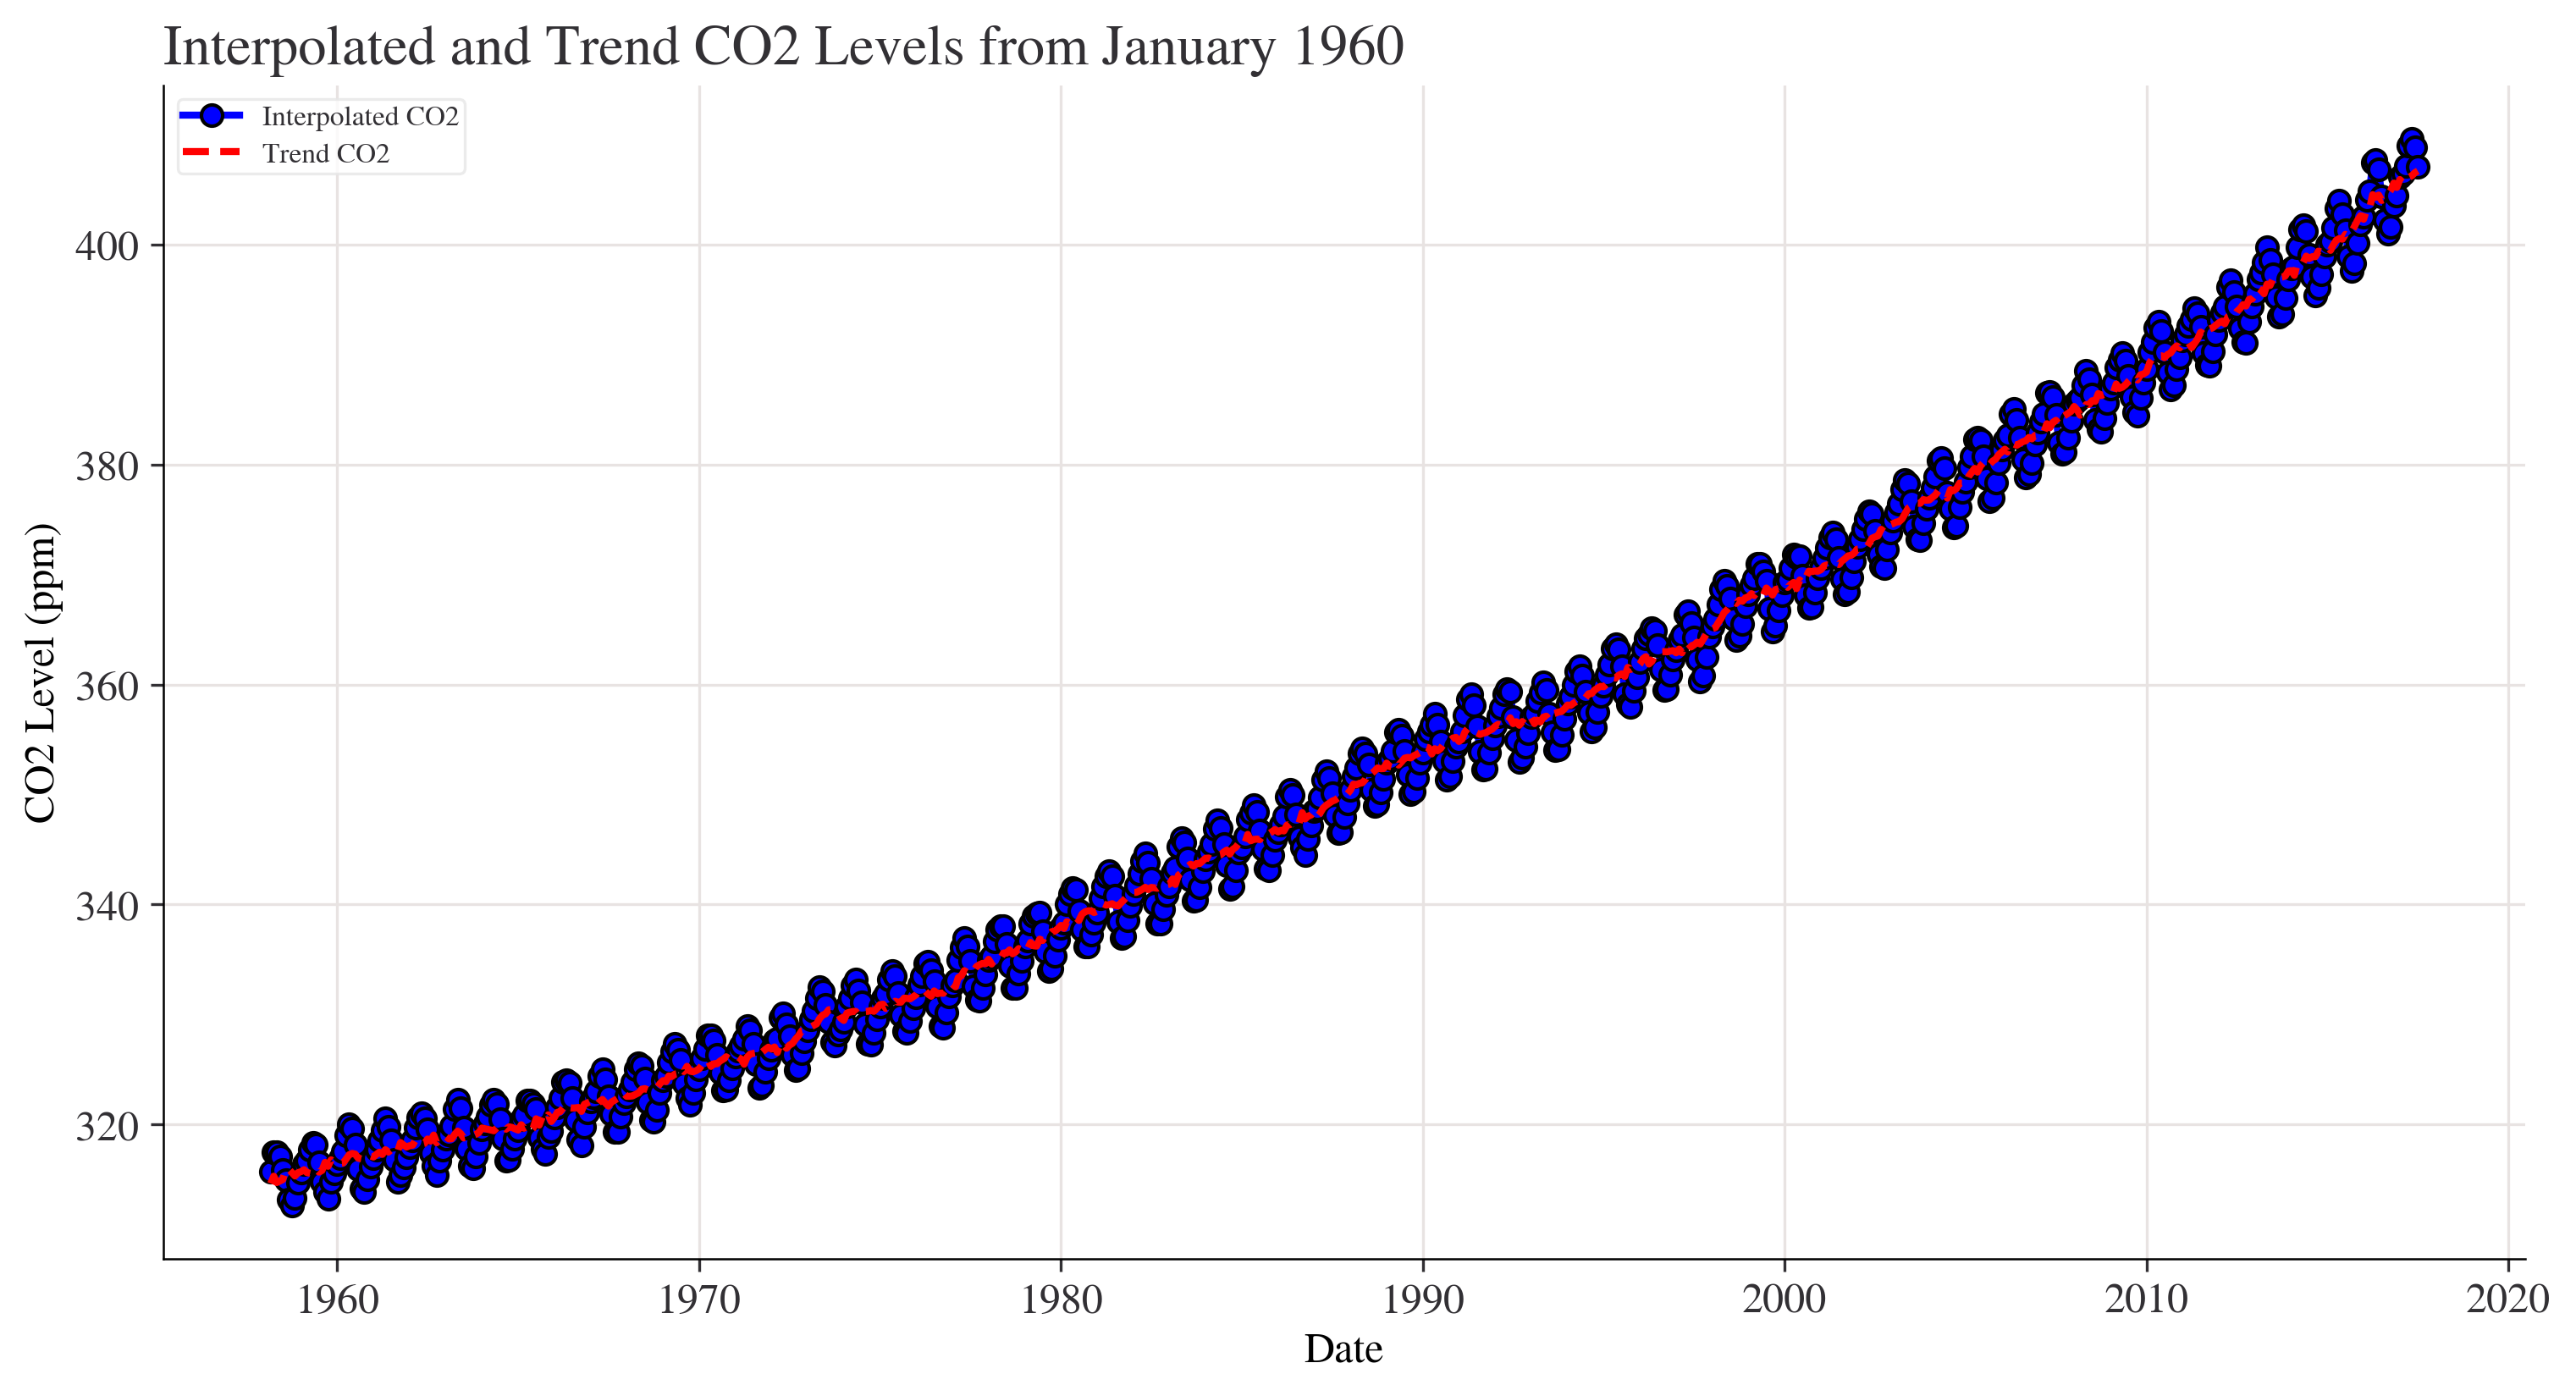

In [ ]:
'''
Plot a line chart with interpolated and trend CO2 levels on the vertical axis and time (starting from January 1960) on the horizontal axis.
Label the axes and the chart legend, and give your chart an appropriate title. 

'''

zhy_co2['Month'] = zhy_co2['Month'].astype(str).str.zfill(2) 
zhy_co2['Date'] = zhy_co2.apply(lambda row: f"{row['Year']}-{row['Month']}-01", axis=1)
zhy_co2['Date'] = pd.to_datetime(zhy_co2['Date'])
zhy_co2.set_index('Date', inplace=True)



fig, ax = plt.subplots(figsize=(12, 6))
# 插值CO2数据
ax.plot(zhy_co2.index, zhy_co2['Interpolated'], label='Interpolated CO2', color='blue', marker='o')
# 趋势CO2数据
ax.plot(zhy_co2.index, zhy_co2['Trend'], label='Trend CO2', color='red', linestyle='--')
ax.set_title('Interpolated and Trend CO2 Levels from January 1960')
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Level (ppm)')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\26768\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) STIXGeneral.
  fig.canvas.print_figure(bytes_io, **kw)


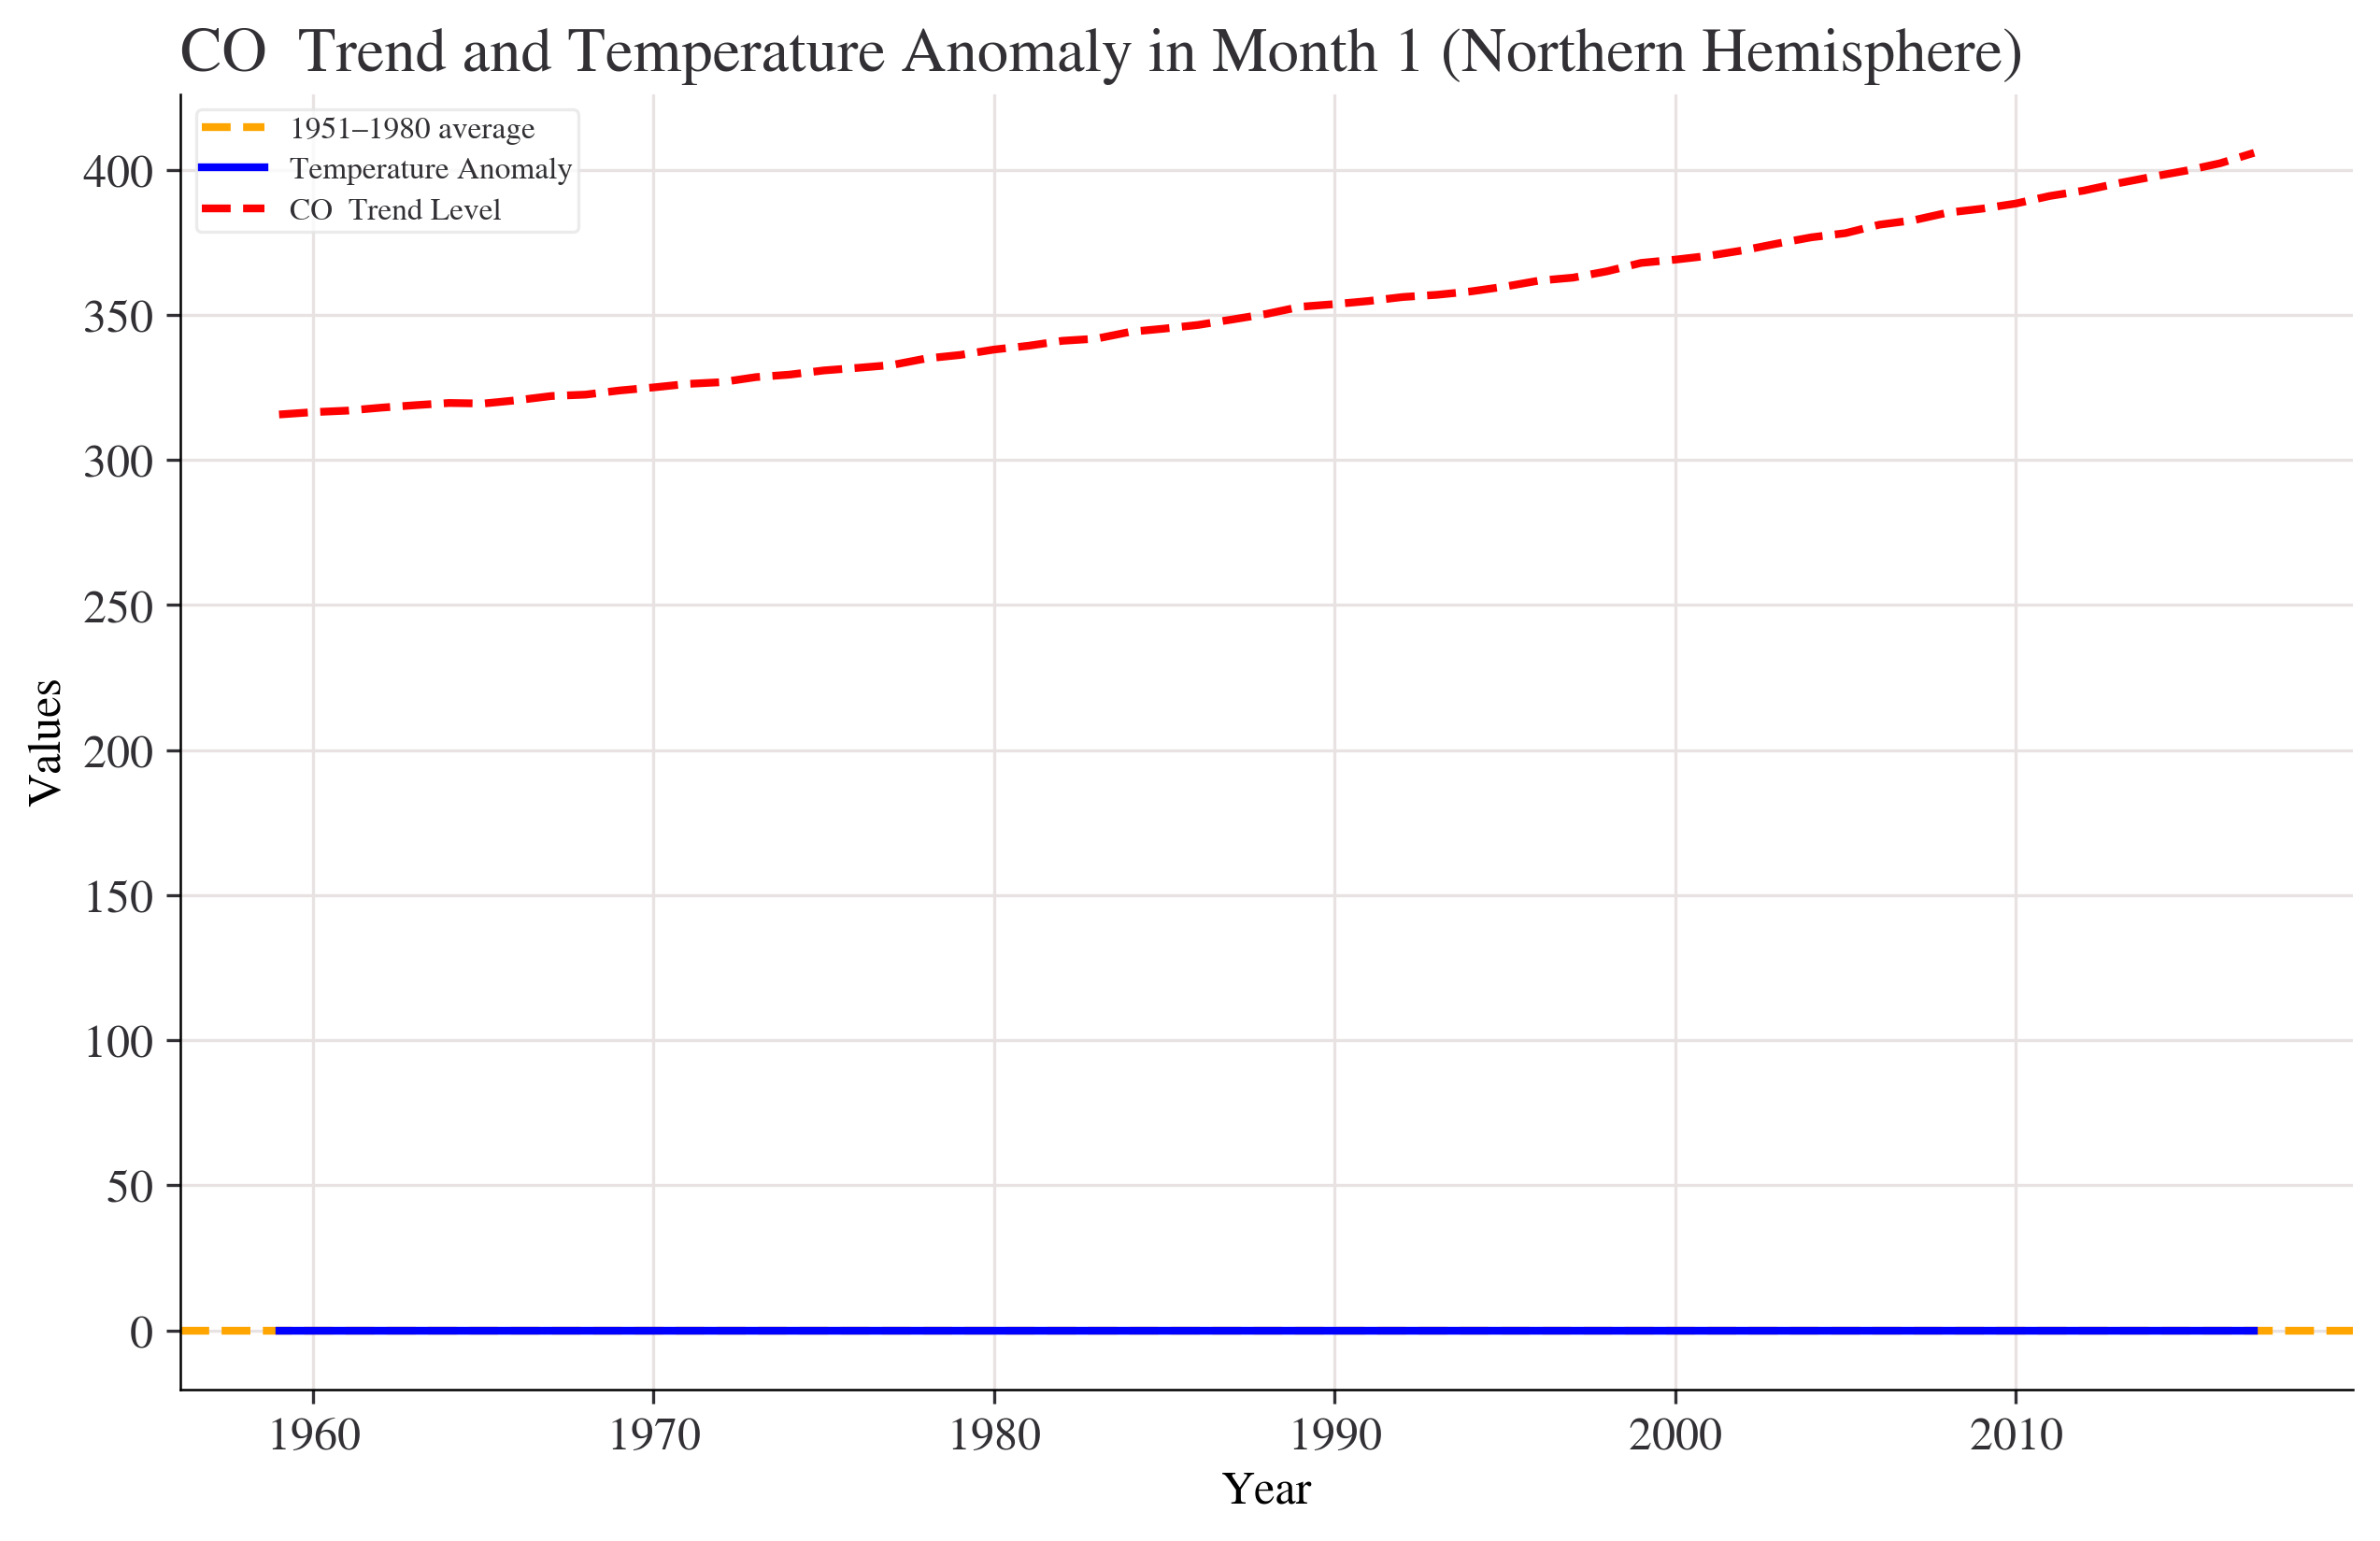

C:\Users\26768\AppData\Local\Temp\ipykernel_20188\4017285474.py:52: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, _ = pearsonr(combined_data['CO₂ Trend Level'], combined_data['Temperature Anomaly'])
C:\Users\26768\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) STIXGeneral.
  fig.canvas.print_figure(bytes_io, **kw)


Correlation between CO₂ levels and temperature anomaly in month 1: nan


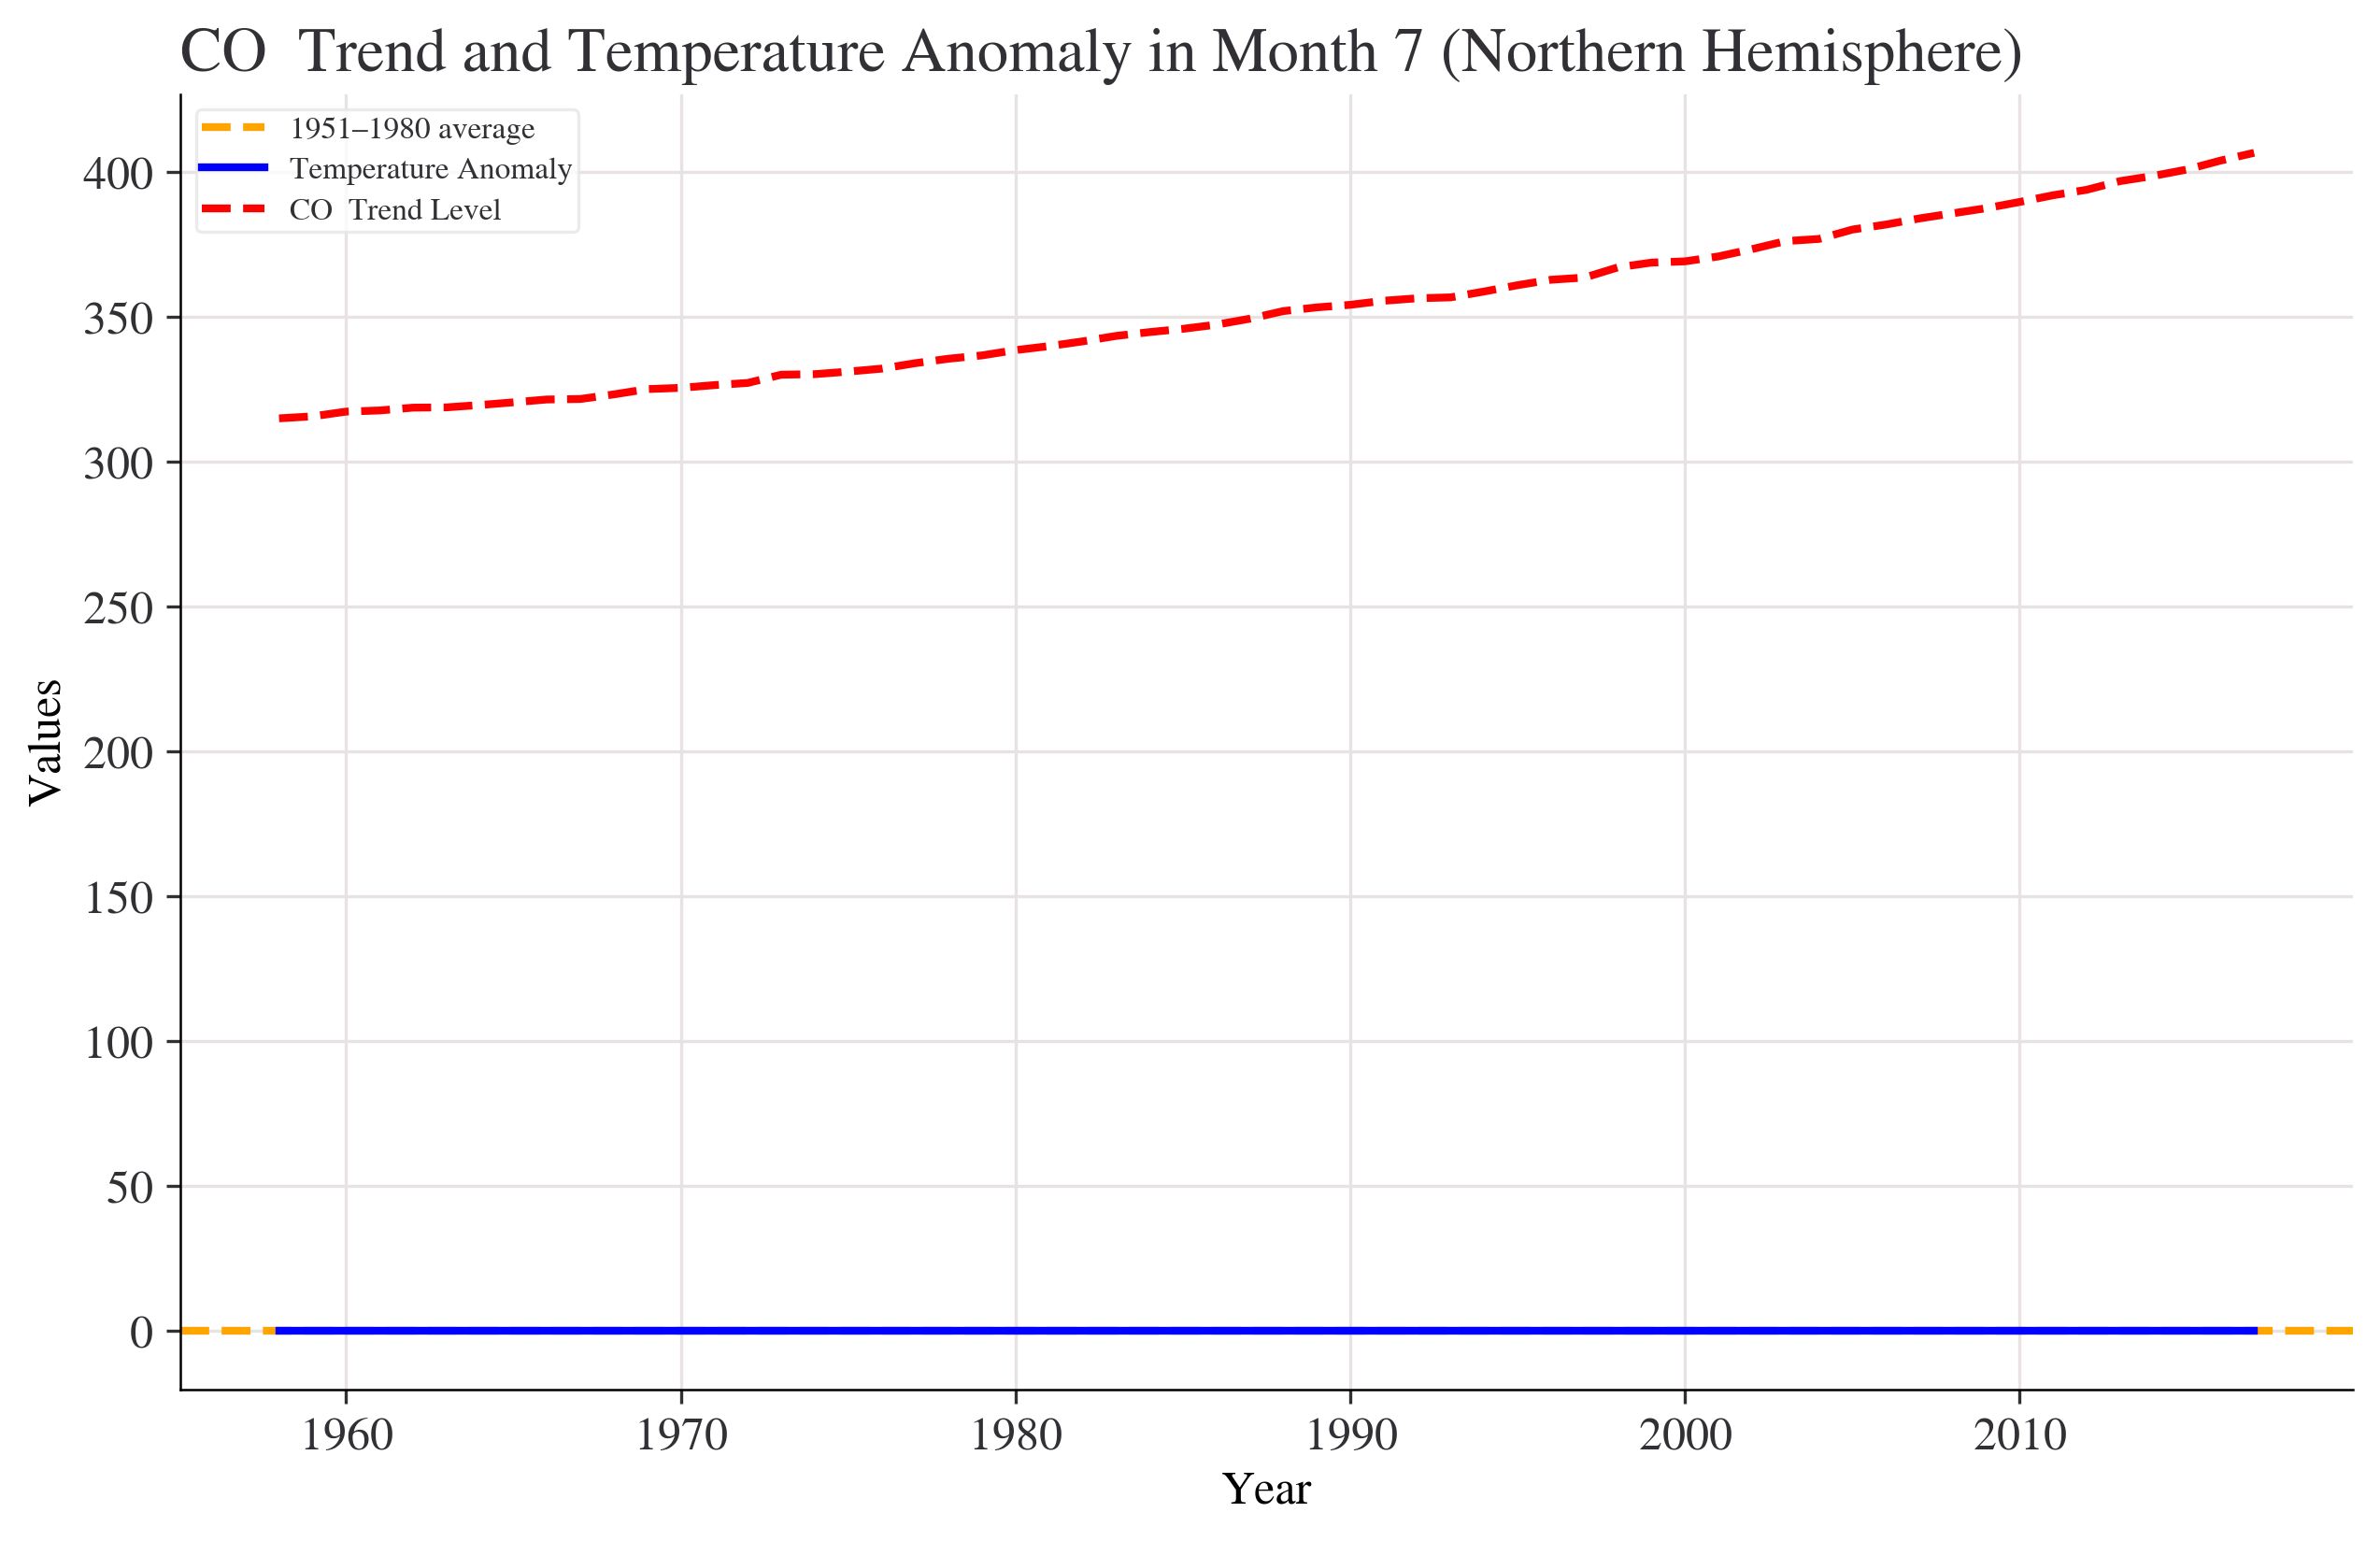

Correlation between CO₂ levels and temperature anomaly in month 7: nan


C:\Users\26768\AppData\Local\Temp\ipykernel_20188\4017285474.py:52: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, _ = pearsonr(combined_data['CO₂ Trend Level'], combined_data['Temperature Anomaly'])


In [145]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr

# 读取 CO2 和温度数据
co2_data = pd.read_csv("data/1_CO2-data.csv")
temperature_data = pd.read_csv("temperature_anomaly_data.csv")

# 确保数据中有 'Year', 'Month' 和 'Trend' 列
if 'Year' in co2_data.columns and 'Month' in co2_data.columns and 'Trend' in co2_data.columns:
    co2_data['year'] = co2_data['Year']
    co2_data['month'] = co2_data['Month']
    co2_data['co2_trend'] = co2_data['Trend']
else:
    raise KeyError("CO2 数据缺少 'Year', 'Month' 或 'Trend' 列，请检查数据文件")

if 'Year' in temperature_data.columns:
    temperature_data['year'] = temperature_data['Year']
else:
    raise KeyError("温度数据缺少 'Year' 列，请检查数据文件")

# 选择要分析的月份，例如 1 月和 7 月
months_to_compare = [1, 7]  # 可更改为任意月份
for month in months_to_compare:
    # 筛选出 CO₂ 趋势数据中指定月份的记录
    co2_month_data = co2_data[co2_data['month'] == month][['year', 'co2_trend']]
    co2_month_data.set_index('year', inplace=True)

    # 获取温度数据中的年度异常（假设是 `Average Anomaly`，如果是按月异常则需要修改）
    temp_month_data = temperature_data[['year', 'Average Anomaly']].dropna()
    temp_month_data.set_index('year', inplace=True)

    # 合并 CO₂ 趋势数据和温度数据
    combined_data = pd.merge(co2_month_data, temp_month_data, left_index=True, right_index=True)
    combined_data.columns = ['CO₂ Trend Level', 'Temperature Anomaly']

    # 绘制图表
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axhline(0, color="orange", linestyle="--", label="1951–1980 average")
    combined_data['Temperature Anomaly'].plot(ax=ax, color="blue", label="Temperature Anomaly")
    combined_data['CO₂ Trend Level'].plot(ax=ax, color="red", linestyle="--", label="CO₂ Trend Level")

    ax.set_title(f"CO₂ Trend and Temperature Anomaly in Month {month} (Northern Hemisphere)")
    ax.set_xlabel("Year")
    ax.set_ylabel("Values")
    ax.legend(loc="upper left")

    # 显示图表
    plt.show()

    # 计算相关系数
    correlation, _ = pearsonr(combined_data['CO₂ Trend Level'], combined_data['Temperature Anomaly'])
    print(f"Correlation between CO₂ levels and temperature anomaly in month {month}: {correlation:.2f}")



'''
question:
1、In your own words, explain spurious correlation and the difference between correlation and causation.
2、Give an example of spurious correlation, similar to the one above, for either CO2 levels or temperature anomalies.
answer:
1、A spurious correlation is one in which there appears to be a statistical correlation between two variables, but the correlation is actually due to the influence of other factors, or coincidence, rather than a direct causal relationship between the two variables. In other words, although statistically two variables appear to be correlated, there is no actual causal relationship between them.

Difference between correlation and causation
Correlation: refers to the relationship or dependence between two variables. Two variables may exhibit a certain trend or pattern of simultaneous changes, such as temperature and ice cream sales. Correlation does not necessarily mean that one variable causes a change in the other.

Causality: means that a change in one variable directly causes a change in the other variable. Causality needs to be verified by controlling variables, experimental design, etc., rather than by conclusions drawn from merely observing correlations. In other words, causality is directional and logical, whereas correlation is purely quantitative.
2、Taking CO₂ levels and temperature anomalies as an example, assuming that CO₂ levels and temperature anomalies vary very similarly over a certain period of time, we may incorrectly assume that changes in CO₂ levels are the cause of the temperature changes. However, in fact, there may be other factors (e.g., solar activity, changes in the Earth's orbit, etc.) that influence the temperature anomaly, and CO₂ is only one part of the variable. Just because these two variables show similar changes at certain times does not mean that CO₂ is the direct cause of the temperature change.
'''